In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Symmetric Random Walk

In [3]:
def plot_sim(data):

    plt.plot(data)
    plt.show()

def quadratic_variation(data):
    """
    Computes sum of square differences from time t to t+1.

    For a random walk, quadratic variation at time t = t or nobs. 
    Since the absolute difference between X_t and X_t+1 = 1, and 1^2 = 1, this makes sense.
    Simply summate 1 nobs times.
    """
    return np.sum(np.square(data[:-1] - data[1:]), axis=0)

def variance_time_series(data):
    """
    Computes variance at each step in time.
    For a monte carlo sample of a random walk, variance at time t asymptotically approaches t or nobs. 
    This is the computation of qudratic variation (variance) at time t.
    """
    return np.array([np.var(data[i,:]) for i in np.arange(0, np.shape(data)[0])])

def random_walk(t, n):
    """
    Random Walk Monte Carlo Simulation.
    """

    y_0 = np.zeros(shape=(1, n))
    y = np.cumsum(np.concatenate([y_0, np.random.choice([1, -1], size=(t, n))]), axis=0)
    
    return y

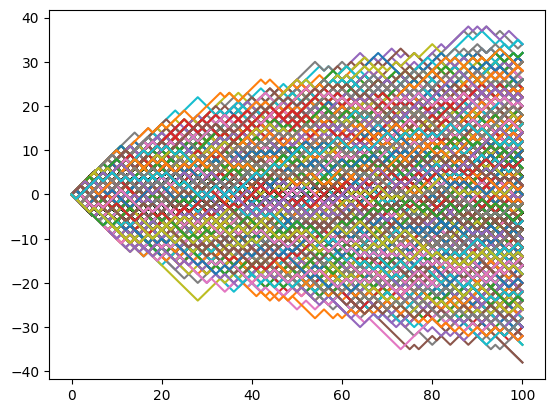

In [4]:
time = 100
n_sims = 10000

sim = random_walk(t=time, n=n_sims)
plot_sim(sim)

In [5]:
quadratic_variation(data=sim)

array([100., 100., 100., ..., 100., 100., 100.])

In [6]:
variance_time_series(data=sim)

array([  0.        ,   0.99991536,   1.940604  ,   2.90238064,
         3.914631  ,   4.93655036,   5.93238384,   6.93597296,
         7.91318556,   8.924799  ,  10.00818684,  11.10851776,
        12.12142576,  13.155119  ,  14.22758556,  15.28299836,
        16.23354204,  17.24664304,  18.21140956,  19.14928316,
        20.08904304,  21.05744624,  21.97811356,  23.05403036,
        24.128319  ,  25.13276784,  26.17101936,  27.19188464,
        28.27943024,  29.21484784,  30.26340976,  31.352719  ,
        32.25138524,  33.18633536,  34.251175  ,  35.38308604,
        36.46493424,  37.34648124,  38.26620096,  39.40025344,
        40.28302204,  41.32667776,  42.28628476,  43.351175  ,
        44.372316  ,  45.468316  ,  46.29580656,  47.34206704,
        48.50847984,  49.64871424,  50.594079  ,  51.71767644,
        52.92708864,  54.019791  ,  55.12743664,  56.33252464,
        57.463975  ,  58.39047616,  59.32247536,  60.18126524,
        61.20852316,  62.25396476,  63.33571824,  64.25

# Wiener Process as the Limit of a Scaled Symmetric Random Walk

In [23]:
def scaled_random_walk(t, n_sims, n_increments):
    """
    Scaled Random Walk Monte Carlo Simulation.

    To approximate a Wiener Process or Brownian Motion, increase the granularity and take smaller steps.

    Let n represent the number of sub-increments within t observations (i.e., intra-period increments).

    Let n = 1 for a simple random walk monte carlo simulation.

    Let n > 1 when approximating a Wiener Process / Brownian Motion (i.e., increase the steps to approach continuous time).

    Let Y_nt be the evolution of a random walk.

    Scale a random walk by the sub-increments to asymptotically approximate Brownian Motion.
    
    W_n(t) = 1 / sqrt(n) * Y_nt

    Since a random walk follows the Binomial Distribution (i.e., a series of Bernoulli experiments), the limiting distribution of W_n(t)
    asymptotically approaches W_n(t) ~ N(0, t). 

    """

    y_0 = np.zeros(shape=(1, n_sims))
    y = 1 / np.sqrt(n_increments) * np.cumsum(np.concatenate([y_0, np.random.choice([1, -1], size=(t * n_increments, n_sims))]), axis=0)
    
    return y

def nCk(n, k):
    """
    Permutations for k choices from n options.
    """
    return np.math.factorial(int(n)) / (np.math.factorial(int(k)) * np.math.factorial(int(n - k))) 

def binomial_pdf(p, n, k):
    """
    Probability of observing something k times out of n obserations. 
    """
    return nCk(n=n, k=k) * p ** n * (1 - p) ** (n - k) 

In [57]:
a = 1 / np.sqrt(10) * np.arange(-10*10, 10*10)

In [61]:
1 / np.sqrt(10)

0.31622776601683794

In [49]:
[binomial_pdf(p=0.5, n=10*10, k=k) for k in range(10*10+1)]

C:\Users\marcu\AppData\Local\Temp\ipykernel_31352\4246342592.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(int(n)) / (np.math.factorial(int(k)) * np.math.factorial(int(n - k)))


[6.223015277861142e-61,
 1.2446030555722283e-58,
 1.232157025016506e-56,
 8.050092563441173e-55,
 3.904294893268969e-53,
 1.499249239015284e-51,
 4.747622590215066e-50,
 1.2750757813720463e-48,
 2.9645511916900077e-47,
 6.0608602141217936e-46,
 1.1030765589701664e-44,
 1.8050343692239087e-43,
 2.6774676476821312e-42,
 3.6248792768619623e-41,
 4.5052071012427246e-40,
 5.165970809424991e-39,
 5.488843985014053e-38,
 5.42426934989624e-37,
 5.0023817337931994e-36,
 4.317845286010972e-35,
 3.4974546816688873e-34,
 2.6647273765096285e-33,
 1.9137587522205514e-32,
 1.2980276754191566e-31,
 8.329010917272921e-31,
 5.0640386377019364e-30,
 2.921560752520348e-29,
 1.6014481161963388e-28,
 8.350408034452338e-28,
 4.14640950676254e-27,
 1.962633833200936e-26,
 8.863507633810677e-26,
 3.8223876670808546e-25,
 1.575287038554534e-24,
 6.208484210773752e-24,
 2.3414854737775294e-23,
 8.4553642108633e-23,
 2.925098970244601e-22,
 9.699012375021573e-22,
 3.083788550006859e-21,
 9.405555077520919e-21,
 2

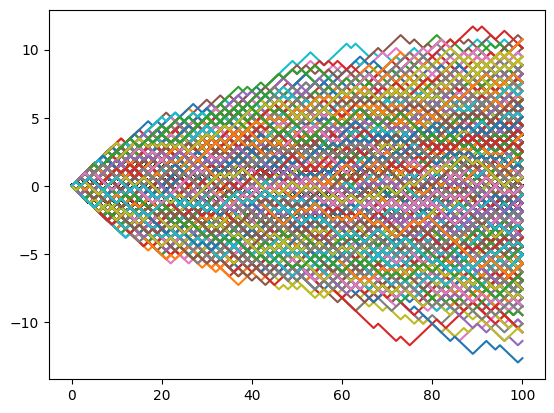

C:\Users\marcu\AppData\Local\Temp\ipykernel_31352\4246342592.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(int(n)) / (np.math.factorial(int(k)) * np.math.factorial(int(n - k)))


ValueError: factorial() not defined for negative values

In [24]:
p = 0.5
time = 10
n_sims = 10000
n_increments_frontier = [10, 25, 50, 100, 500, 1000]

for n_increments in n_increments_frontier:

    sigma = np.sqrt(time * n_increments)

    # Run monte carlo sim
    sim = scaled_random_walk(t=time, n_sims=n_sims, n_increments=n_increments)
    plot_sim(sim)

    binomial_prob = pd.Series(np.array([binomial_pdf(p=p, n=time*n_increments, k=k) for k in sim[-1]]))
    binomial_prob.plot(label='Binomial Random Walk')

    # Get probability density function of normal distribution with sigma = sqrt(t)
    x = np.linspace(-4*sigma, 4*sigma, 1000)
    normal_prob = pd.Series(stats.norm.pdf(x, loc=0, scale=sigma), index=x)

    normal_prob.plot(label='Normal')

    plt.show()

In [31]:
np.array([nCk(n=time*n_increments, k=k) for k in sim[-1]])

C:\Users\marcu\AppData\Local\Temp\ipykernel_31352\4246342592.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(int(n)) / (np.math.factorial(int(k)) * np.math.factorial(int(n - k)))


ValueError: factorial() not defined for negative values

In [40]:
nCk(n=time*n_increments, k=k)

C:\Users\marcu\AppData\Local\Temp\ipykernel_31352\4246342592.py:33: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(int(n)) / (np.math.factorial(int(k)) * np.math.factorial(int(n - k)))


ValueError: factorial() not defined for negative values